## TapDanceDecoder: MVP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Get Data

In [2]:
#tap_df = pd.read_csv('../../../Source/Data/Train_data_n40.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_full.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_filterbanks.csv')
tap_df = pd.read_csv('../../../Source/Data/audio_data_augmented.csv')

In [3]:
tap_df.head()

,Path,Labels,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,BPM,ZCR,RMSE,STE
0,../../../Source/Clean_train_clips/Shuffle/1/1.wav,1,-152.435155,78.311769,-106.482258,40.668131,-6.848575,-13.537377,-25.102485,6.754208,...,-10.265548,-2.854873,-2.821410,-11.892168,-1.505338,-2.087528,258.398438,0.183553,0.113765,3.927907
1,../../../Source/Clean_train_clips/Shuffle/1/10...,1,-143.991075,65.523449,-102.436753,32.133732,-7.930019,-3.615873,-29.871724,-0.182348,...,-13.680871,-0.441789,-5.826206,-15.578982,-4.161982,-2.657234,215.332031,0.187988,0.105637,3.369918
2,../../../Source/Clean_train_clips/Shuffle/1/10...,1,-111.612287,38.485560,-82.105803,20.092784,4.521734,-11.397102,-17.515387,-4.323631,...,-11.721482,0.729660,-4.075102,-13.519880,-2.646125,-1.819422,215.332031,0.237868,0.106001,3.373906
3,../../../Source/Clean_train_clips/Shuffle/1/10...,1,-124.765927,59.099908,-107.706609,34.986722,-7.126354,-4.114656,-28.856100,0.194913,...,-14.683264,-0.436352,-6.158605,-14.315085,-3.680532,-3.380997,215.332031,0.187538,0.106388,3.366737
4,../../../Source/Clean_train_clips/Shuffle/1/10...,1,-171.803904,61.124764,-105.591733,32.832019,-7.868860,-2.751917,-29.451636,0.423611,...,-13.807159,-0.393419,-5.879256,-15.103948,-3.742887,-3.202471,123.046875,0.204491,0.075551,1.817998


## Models

### LogReg it like you mean it!

In [4]:
data = tap_df.iloc[:,2:].values
labels = tap_df['Labels']

In [6]:
#data
#labels


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=11, stratify=labels)

In [ ]:
#X_train = pd.read_csv('../../../Source/Data/X_train_mfccplus.csv')
#y_train = pd.read_csv('../../../Source/Data/y_train_mfccplus.csv')
#X_test = pd.read_csv('../../../Source/Data/X_test_mfccplus.csv')
#y_test = pd.read_csv('../../../Source/Data/y_test_mfccplus.csv')
#
#X_train = X_train.drop(['Path'], axis = 1).values
#X_test = X_test.drop(['Path'], axis = 1).values
#y_train = y_train.values.ravel()
#y_test = y_test.values.ravel()

In [8]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
predict = logreg.predict(X_test)
proba = logreg.predict_proba(X_test)

In [10]:
results = pd.DataFrame()
results['True'] = y_test
results['Predict_lr'] = predict
results['Prob_0_lr'] = proba[:,0]

In [11]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_lr'])]
mistakes

,True,Predict_lr,Prob_0_lr
262,1,0,0.672475
887,0,1,0.134345
765,0,1,0.350725
1105,0,1,0.367740
1137,0,1,0.228113
926,0,1,0.165670
249,1,0,0.519157
136,1,0,0.571837
885,0,1,0.139835
142,1,0,0.695228


In [12]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict)))

Accuracy score: 0.883495145631068


### Visualizing results

In [13]:
def ROC_plot (testname, y_true, y_prob):
    
    logit_roc_auc = roc_auc_score(y_true, y_prob)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate', size=15)
    plt.ylabel('True Positive Rate', size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title('ROC: ' + testname, size=25)
    
    plt.show()
    print ('ROC_AUC_Score: ' + str(logit_roc_auc))

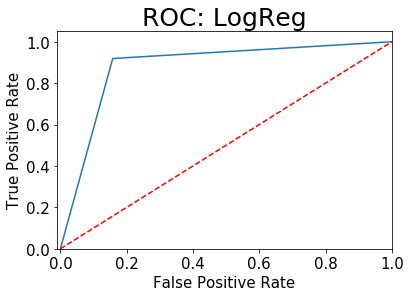

ROC_AUC_Score: 0.8805120910384068


In [14]:
ROC_plot('LogReg',  y_test, predict )

## Can't see the forest for the trees.... Random Forest Classifier

In [15]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
predict_rf = rnd_clf.predict(X_test)
proba_rf = rnd_clf.predict_proba(X_test)

In [17]:
results['Predict_rf'] = predict_rf
results['Prob_0_rf'] = proba_rf[:,0]

In [18]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_rf'])]
mistakes

,True,Predict_lr,Prob_0_lr,Predict_rf,Prob_0_rf
1002,0,0,0.864150,1,0.435905
810,0,0,0.680564,1,0.456222
887,0,1,0.134345,1,0.378860
765,0,1,0.350725,1,0.376412
332,1,1,0.194255,0,0.511153
1148,0,0,0.641082,1,0.467885
812,0,0,0.714218,1,0.407220
73,1,1,0.302549,0,0.621269
885,0,1,0.139835,1,0.493955
89,1,1,0.424299,0,0.533870


So where the Random Forest model makes mistakes, the LogReg model makes correct predictions. <br/>Perhaps a voting classifier would improve the accuracy even more.

In [19]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict_rf)))

Accuracy score: 0.9466019417475728


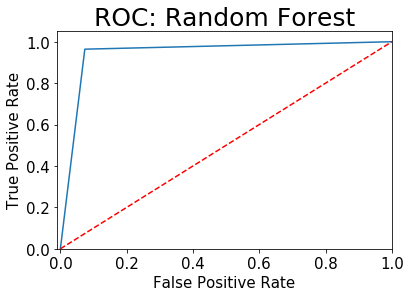

ROC_AUC_Score: 0.945139876718824


In [20]:
ROC_plot('Random Forest', y_test, predict_rf)

In [21]:
#results.to_csv('../../../Source/Data/Train_results_augmented.csv', index=None)